In [233]:
import pandas as pd
import altair as alt
import numpy as np
import scipy
alt.data_transformers.disable_max_rows()
import matplotlib.pyplot as plt
import time

In [266]:
raw_data_hr = pd.read_json('data_dump_spo2.json', orient='index')
raw_data_hr['tst'] = raw_data_hr['tst'] * 1000
raw_data_hr = raw_data_hr.loc[(raw_data_hr['ir'] != 0) & (raw_data_hr['red'] != 0)]
#aw_data_hr.rename(columns={'raw_readings_ir':'ir', 'raw_readings_red':'red'}, inplace=True)
#raw_data_hr = raw_data_hr.loc[(raw_data_hr['ir'] > 50000) & (raw_data_hr['red'] != 0)].reset_index(drop=True).reset_index()
#raw_data_hr = raw_data_hr.loc[raw_data_hr.index<5000]
raw_data_hr #[['raw_readings_ir','raw_readings_red']]

,result_red,mean_red,w_ir,result_ir,ir,w_red,tst,mean_ir,red
0,36616.000000,36616.000000,5.371200e+04,53712.000000,53712,36616.000000,1594418378472000,53712.000000,36616
1,34817.200000,35716.600000,1.048584e+05,51146.400000,53832,71433.200000,1594418378473000,52429.200000,36648
2,33124.340000,34852.513333,1.534715e+05,48613.080000,53856,104557.540000,1594418378474000,51157.160000,36696
3,31524.123000,34020.415750,1.997259e+05,46254.426000,53928,136081.663000,1594418378475000,49931.476500,36752
4,29939.916850,33204.315970,2.436996e+05,43973.704700,53960,166021.579850,1594418378476000,48739.922140,36744
...,...,...,...,...,...,...,...,...,...
396,42.504413,49.070230,1.014390e+06,244.719078,50952,662712.416152,1594418379013000,276.243854,33176
397,40.379192,51.416719,1.014623e+06,232.483124,50952,662752.795344,1594418379015000,296.031662,33176
398,70.360233,52.045883,1.014564e+06,-59.141032,50672,662823.155577,1594418379017000,253.230079,33208
399,98.842221,55.843589,1.014859e+06,295.816020,51024,662921.997798,1594418379018000,247.768575,33240


In [235]:
i_rms_red = np.sqrt(raw_data_hr[2000:4000]['result_red'].apply(lambda j: j*j).sum()/len(x))
i_dc_red = 40200
i_rms_ir = np.sqrt(raw_data_hr[2000:4000]['result_ir'].apply(lambda j: j*j).sum()/len(x))
i_dc_ir = 27100
R = (i_rms_red * 600 * i_dc_ir) / (i_rms_ir * 900 * i_dc_red) 

R

TypeError: object of type 'numpy.float64' has no len()

In [236]:
0.98 = K1 -  K2 * 0.259

0.94 = K1 -  K2 * 0.19

0.94 = K1 -  K2 * 0.19

SyntaxError: can't assign to literal (<ipython-input-236-0ce4401b2a64>, line 1)

In [237]:
b, a = scipy.signal.butter(1, 0.01, 'low', fs=1, output='ba')
raw_data_hr['butterworth_red'] = scipy.signal.filtfilt(b, a, raw_data_hr['result_red'])

data = raw_data_hr[2000:]
alt.Chart(data).mark_line().encode(
    x='tst',
    y='butterworth_red',
).properties(
    width=1000,
    height=400
)

AttributeError: module 'scipy' has no attribute 'signal'

In [238]:
data = raw_data_hr[2000:4000]
alt.Chart(data).mark_line().encode(
    x='tst',
    y='result_ir',
).properties(
    width=1000,
    height=400
)

alt.Chart(...)

In [239]:
data = raw_data_hr[2000:4000]
alt.Chart(data).mark_line().encode(
    x='tst',
    y='result_red',
).properties(
    width=1000,
    height=400
)

alt.Chart(...)

In [240]:
data = raw_data_hr[2000:2500]
alt.Chart(data).mark_line().encode(
    x='tst',
    y='mean_ir',
).properties(
    width=1000,
    height=400
)

alt.Chart(...)

In [241]:
data = raw_data_hr[2000:4000]
alt.Chart(data).mark_line().encode(
    x='tst',
    y='mean_red',
).properties(
    width=1000,
    height=400
)

alt.Chart(...)

In [242]:
raw_data_hr_melted = raw_data_hr.melt(value_vars=['ir','red'], id_vars='tst')
raw_data_hr_melted

,tst,variable,value
0,1594418378472000,ir,53712
1,1594418378473000,ir,53832
2,1594418378474000,ir,53856
3,1594418378475000,ir,53928
4,1594418378476000,ir,53960
...,...,...,...
797,1594418379013000,red,33176
798,1594418379015000,red,33176
799,1594418379017000,red,33208
800,1594418379018000,red,33240


In [243]:
data = raw_data_hr[1000:2000]
alt.Chart(data).mark_line().encode(
    x='tst',
    y='result_ir',
).properties(
    width=1000,
    height=400
)

alt.Chart(...)

In [244]:
alt.Chart(raw_data_hr_melted).mark_line().encode(
    x='tst',
    y=alt.Y('value:Q',
        scale=alt.Scale(domain=(10000, 65000))
    ),
    color='variable'
).properties(
    width=1000,
    height=400
)

alt.Chart(...)

In [245]:
class dcFilter_t:
    def __init__(self):
        self.w = None
        self.result = None

def dc_filter(x, alpha=0.95):
    print(x.ir, x.name)
    if x.name ==0:
        prev_w = 0
    filtered = {'w':None, 'result': None}
    filtered['w'] = x.ir + alpha * prev_w ;
    filtered['result'] = filtered['w'] - prev_w;
    return filtered



In [246]:
def _wR(i, col):
    x_i = raw_data_hr_melted.loc[raw_data_hr_melted['variable'] == col, 'value'].loc[i]
    if i==0:
        return x_i
    return x_i + _wR(i-1, col)

def _w(x, col): 
    return _wR(int(x.name), col)

In [247]:
_filtered = {}

for i in raw_data_hr.index:
    _filtered[i] = {}
    if i==0:
        _filtered[i]['w_ir'] = raw_data_hr.loc[i, 'ir']
        _filtered[i]['result_ir'] = _filtered[i]['w_ir']
    else:
        _filtered[i]['w_ir'] = raw_data_hr.loc[i, 'ir'] + 0.95 * _filtered[i-1]['w_ir']
        _filtered[i]['result_ir'] = _filtered[i]['w_ir'] - _filtered[i-1]['w_ir']
        
for i in raw_data_hr.index:
    if i==0:
        _filtered[i]['w_red'] = raw_data_hr.loc[i, 'red']
        _filtered[i]['result_red'] = _filtered[i]['w_red']
    else:
        _filtered[i]['w_red'] = raw_data_hr.loc[i, 'red'] + 0.95 * _filtered[i-1]['w_red']
        _filtered[i]['result_red'] = _filtered[i]['w_red'] - _filtered[i-1]['w_red']

In [248]:
_filtered

{0: {'w_ir': 53712, 'result_ir': 53712, 'w_red': 36616, 'result_red': 36616},
 1: {'w_ir': 104858.4,
  'result_ir': 51146.399999999994,
  'w_red': 71433.2,
  'result_red': 34817.2},
 2: {'w_ir': 153471.47999999998,
  'result_ir': 48613.07999999999,
  'w_red': 104557.54,
  'result_red': 33124.34},
 3: {'w_ir': 199725.906,
  'result_ir': 46254.42600000001,
  'w_red': 136081.663,
  'result_red': 31524.123000000007},
 4: {'w_ir': 243699.6107,
  'result_ir': 43973.7047,
  'w_red': 166021.57984999998,
  'result_red': 29939.91684999998},
 5: {'w_ir': 285498.630165,
  'result_ir': 41799.01946499999,
  'w_red': 194456.50085749998,
  'result_red': 28434.9210075},
 6: {'w_ir': 325191.69865674997,
  'result_ir': 39693.06849174999,
  'w_red': 221445.67581462496,
  'result_red': 26989.174957124982},
 7: {'w_ir': 362956.11372391245,
  'result_ir': 37764.41506716248,
  'w_red': 247133.3920238937,
  'result_red': 25687.71620926875},
 8: {'w_ir': 398848.30803771684,
  'result_ir': 35892.194313804386,
  

In [249]:
filtered = pd.DataFrame(_filtered).transpose()
filtered = filtered.loc[(filtered.index>500) ].reset_index(drop=True).reset_index()
filtered['median_filter_ir'] = scipy.signal.medfilt(filtered['result_ir'], 9)
#butter
b, a = scipy.signal.butter(1, 10/100, 'low', fs=100, output='ba')
filtered['butterworth_red'] = scipy.signal.filtfilt(b, a, filtered['result_red'])
filtered

AttributeError: module 'scipy' has no attribute 'signal'

In [250]:
alt.Chart(filtered).mark_line().encode(
    x='index',
    y='result_ir',
).properties(
    width=1000,
    height=400
)

alt.Chart(...)

In [251]:
alt.Chart(filtered).mark_line().encode(
    x='index',
    y='result_red',
).properties(
    width=1000,
    height=400
)

alt.Chart(...)

In [252]:
alt.Chart(filtered.loc[(filtered.index>540) & (filtered.index<2380)]).mark_line().encode(
    x='index',
    y='median_filter_ir',
).properties(
    width=1000,
    height=400
)

ValueError: median_filter_ir encoding field is specified without a type; the type cannot be inferred because it does not match any column in the data.

alt.Chart(...)

In [253]:
x = filtered.loc[(filtered.index>540) & (filtered.index<2380)]
x

,index,w_ir,result_ir,w_red,result_red


In [254]:
filtered.loc[(filtered.index>540) & (filtered.index<2380)]

,index,w_ir,result_ir,w_red,result_red


In [438]:
alt.Chart(filtered).mark_line().encode(
    x='index',
    y='butterworth_red',
).properties(
    width=1000,
    height=400
)

alt.Chart(...)

In [376]:
data = {
    0: {'v1': 21312,'v2':33223},
    1: {'v1': 21312,'v2':33223},
    2: {'v1': 21312,'v2':33223},
    3: {'v1': 21312,'v2':33223},
    4: {'v1': 21312,'v2':33223},
    5: {'v1': 21312,'v2':33223},
    6: {'v1': 21312,'v2':33223},
}

In [377]:
[v for k,v in data.items()]

[{'v1': 21312, 'v2': 33223},
 {'v1': 21312, 'v2': 33223},
 {'v1': 21312, 'v2': 33223},
 {'v1': 21312, 'v2': 33223},
 {'v1': 21312, 'v2': 33223},
 {'v1': 21312, 'v2': 33223},
 {'v1': 21312, 'v2': 33223}]

In [405]:
def get_last_k_readings(data, var, kernel_size):
    x = list(data.items())
    x.reverse()
    return np.array([v[var] for i, v in x if i > len(x) - kernel_size - 1])

In [409]:
data = {
    0: {'v1': 21312,'v2':33223},
}

In [410]:
get_last_k_readings(data, 'v1', 10)

array([21312])

In [450]:
scipy.signal.butter(1, 7.5/100, 'low', fs=100, output='ba')

(array([0.00235066, 0.00235066]), array([ 1.        , -0.99529868]))

### Heart Rate using FFT

In [258]:
a,b = 0, 400
t_vec = np.array(raw_data_hr[a:b]['tst'])
t_vec = (t_vec - 1593276160000000)/1e6
ir_vec = np.array(raw_data_hr[a:b]['ir'])
red_vec = np.array(raw_data_hr[a:b]['red'])
samp_rate = 1/np.mean(np.diff(t_vec))
samp_rate

730.7692309611897

In [259]:
raw_data_hr

,result_red,mean_red,w_ir,result_ir,ir,w_red,tst,mean_ir,red
0,36616.000000,36616.000000,5.371200e+04,53712.000000,53712,36616.000000,1594418378472000,53712.000000,36616
1,34817.200000,35716.600000,1.048584e+05,51146.400000,53832,71433.200000,1594418378473000,52429.200000,36648
2,33124.340000,34852.513333,1.534715e+05,48613.080000,53856,104557.540000,1594418378474000,51157.160000,36696
3,31524.123000,34020.415750,1.997259e+05,46254.426000,53928,136081.663000,1594418378475000,49931.476500,36752
4,29939.916850,33204.315970,2.436996e+05,43973.704700,53960,166021.579850,1594418378476000,48739.922140,36744
...,...,...,...,...,...,...,...,...,...
396,42.504413,49.070230,1.014390e+06,244.719078,50952,662712.416152,1594418379013000,276.243854,33176
397,40.379192,51.416719,1.014623e+06,232.483124,50952,662752.795344,1594418379015000,296.031662,33176
398,70.360233,52.045883,1.014564e+06,-59.141032,50672,662823.155577,1594418379017000,253.230079,33208
399,98.842221,55.843589,1.014859e+06,295.816020,51024,662921.997798,1594418379018000,247.768575,33240


In [260]:
heart_rate_range = [0,250] # BPM

In [261]:
heart_rate_range_hz = np.divide(heart_rate_range,60.0)

In [262]:
max_time_bw_samps = 1/heart_rate_range_hz[1]
max_time_bw_samps

0.24

In [263]:
max_pts_bw_samps = max_time_bw_samps*samp_rate
max_pts_bw_samps

175.38461543068553

BPM: 109.6


/Users/ameyadahale/virtualenv/v1/lib/python3.7/site-packages/ipykernel_launcher.py:33: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
/Users/ameyadahale/virtualenv/v1/lib/python3.7/site-packages/ipykernel_launcher.py:34: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.


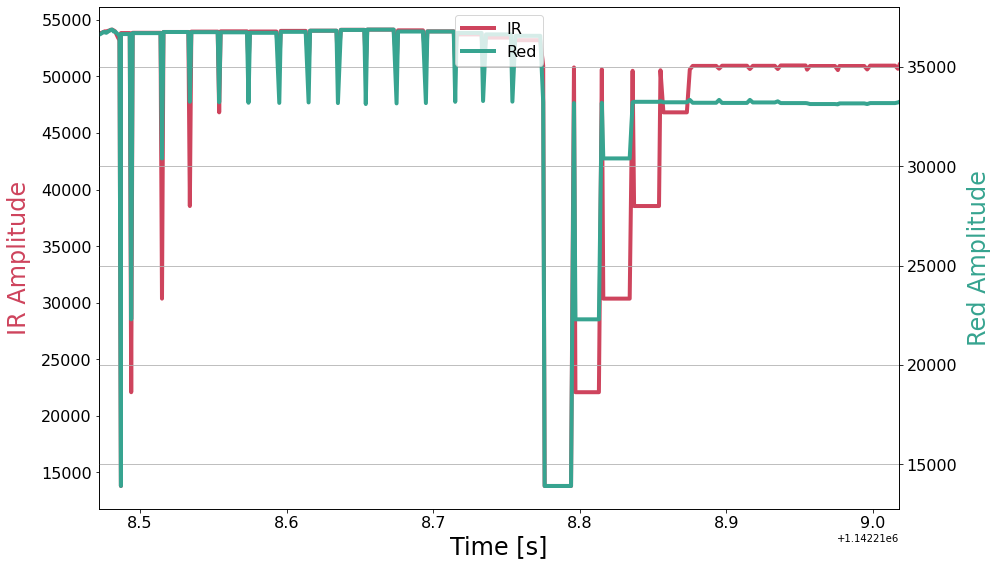

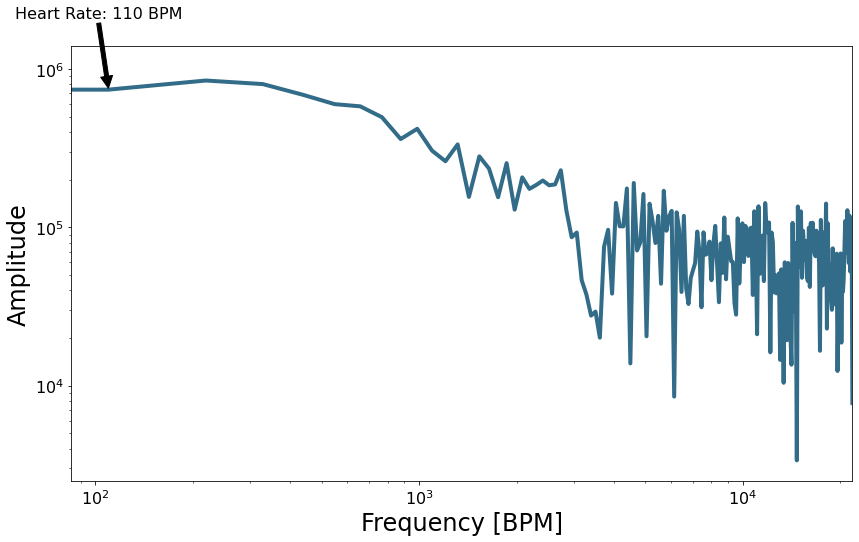

In [264]:
## plotting time series data
fig = plt.figure(figsize=(14,8))
ax1 = fig.add_subplot(111)
ax1.set_xlabel('Time [s]',fontsize=24)
ax1.set_ylabel('IR Amplitude',fontsize=24,color='#CE445D',labelpad=10)
ax1.tick_params(axis='both',which='major',labelsize=16)
plt1 = ax1.plot(t_vec,ir_vec,label='IR',color='#CE445D',linewidth=4)
ax1_2 = plt.twinx()
ax1_2.grid('off')
ax1_2.set_ylabel('Red Amplitude',fontsize=24,color='#37A490',labelpad=10)
ax1_2.tick_params(axis='y',which='major',labelsize=16)
plt2 = ax1_2.plot(t_vec,red_vec,label='Red',color='#37A490',linewidth=4)
lns = plt1+plt2
labels = [l.get_label() for l in lns]
ax1_2.legend(lns,labels,fontsize=16,loc='upper center')
plt.xlim([t_vec[0],t_vec[-1]])
plt.tight_layout(pad=1.2)

## FFT and plotting frequency spectrum of data
f_vec = np.arange(0,int(len(t_vec)/2))*(samp_rate/(len(t_vec)))
f_vec = f_vec*60
fft_var = np.fft.fft(red_vec)
x,y,z = np.abs(fft_var[0]),2.0*np.abs(fft_var[1:int(len(fft_var)/2)]),np.abs(fft_var[int(len(fft_var)/2)])
fft_var = np.append(y,z)

bpm_max_loc = np.argmin(np.abs(f_vec-heart_rate_range[1]))
f_step = 1
f_max_loc = np.argmax(fft_var[f_step:bpm_max_loc])+f_step
print('BPM: {0:2.1f}'.format(f_vec[f_max_loc]))
fig2 = plt.figure(figsize=(14,8))
ax2 = fig2.add_subplot(111)
ax2.loglog(f_vec,fft_var,color=[50/255,108/255,136/255],linewidth=4)
ax2.set_xlim([0,f_vec[-1]])
ax2.set_ylim([np.min(fft_var)-np.std(fft_var),np.max(fft_var)])
ax2.tick_params(axis='both',which='major',labelsize=16)
ax2.set_xlabel('Frequency [BPM]',fontsize=24)
ax2.set_ylabel('Amplitude',fontsize=24)
ax2.annotate('Heart Rate: {0:2.0f} BPM'.format(f_vec[f_max_loc]),
             xy = (f_vec[f_max_loc],fft_var[f_max_loc]+(np.std(fft_var)/10)),xytext=(-10,70),
             textcoords='offset points',arrowprops=dict(facecolor='k'),
             fontsize=16,horizontalalignment='center')
fig2.savefig('max30102_fft_heart_rate.png',dpi=300,facecolor=[252/255,252/255,252/255])
plt.show()

## Using Gradient Appx

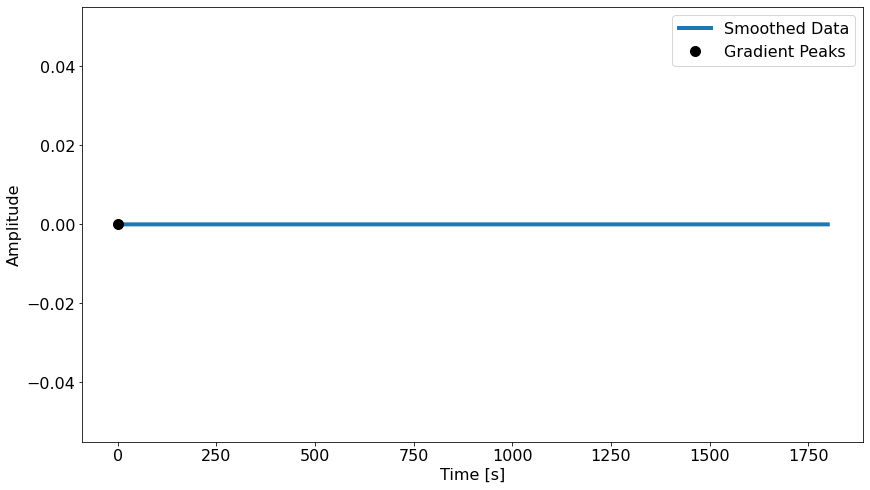

/Users/ameyadahale/virtualenv/v1/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/ameyadahale/virtualenv/v1/lib/python3.7/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/ameyadahale/virtualenv/v1/lib/python3.7/site-packages/numpy/lib/function_base.py:1069: RuntimeWarning: divide by zero encountered in true_divide
  a = -(dx2)/(dx1 * (dx1 + dx2))
/Users/ameyadahale/virtualenv/v1/lib/python3.7/site-packages/numpy/lib/function_base.py:1070: RuntimeWarning: divide by zero encountered in true_divide
  b = (dx2 - dx1) / (dx1 * dx2)
/Users/ameyadahale/virtualenv/v1/lib/python3.7/site-packages/numpy/lib/function_base.py:1071: RuntimeWarning: divide by zero encountered in true_divide
  c = dx1 / (dx2 * (dx1 + dx2))
/Users/ameyadahale/virtualenv/v1/lib/python3.7/site-packages/numpy/lib/function_base.py:1077: RuntimeWarning: i

IndexError: index 0 is out of bounds for axis 0 with size 0

In [265]:
heart_rate_span = [10,250] # max span of heart rate
pts = 1800 # points used for peak finding (400 Hz, I recommend at least 4s (1600 pts)
smoothing_size = 20 # convolution smoothing size

# setup live plotting
plt.ion()
fig = plt.figure(figsize=(14,8))
ax1 = fig.add_subplot(111)
line1, = ax1.plot(np.arange(0,pts),np.zeros((pts,)),linewidth=4,label='Smoothed Data')
line2, = ax1.plot(0,0,label='Gradient Peaks',marker='o',linestyle='',color='k',markersize=10)
ax1.set_xlabel('Time [s]',fontsize=16)
ax1.set_ylabel('Amplitude',fontsize=16)
ax1.legend(fontsize=16)
ax1.tick_params(axis='both',which='major',labelsize=16)
plt.show()


    
# convolve, calculate gradient, and remove bad endpoints

t_vals,y_vals = [], []

samp_rate = 1/np.mean(np.diff(t_vals)) # average sample rate for determining peaks
min_time_bw_samps = (60.0/heart_rate_span[1])

t_vals = t_vec
y_vals = red_vec

y_vals = np.convolve(y_vals,np.ones((smoothing_size,)),'same')/smoothing_size
red_grad = np.gradient(y_vals,t_vals)
red_grad[0:int(smoothing_size/2)+1] = np.zeros((int(smoothing_size/2)+1,))
red_grad[-int(smoothing_size/2)-1:] = np.zeros((int(smoothing_size/2)+1,))  

y_vals = np.append(np.repeat(y_vals[int(smoothing_size/2)],int(smoothing_size/2)),y_vals[int(smoothing_size/2):-int(smoothing_size/2)])
y_vals = np.append(y_vals,np.repeat(y_vals[-int(smoothing_size/2)],int(smoothing_size/2)))

# update plot with new Time and red/IR data
line1.set_xdata(t_vals)
line1.set_ydata(y_vals)

ax1.set_xlim([np.min(t_vals),np.max(t_vals)])
if line1.axes.get_ylim()[0]<0.95*np.min(y_vals) or\
   np.max(y_vals)>line1.axes.get_ylim()[1] or\
   np.min(y_vals)<line1.axes.get_ylim()[0]:
                ax1.set_ylim([np.min(y_vals),np.max(y_vals)])
#plt.pause(0.001)

# peak locator algorithm
peak_locs = np.where(red_grad<-np.std(red_grad))
# if len(peak_locs[0])==0:
#     continue

prev_pk = peak_locs[0][0]
true_peak_locs,pk_loc_span = [],[]
for ii in peak_locs[0]:
    y_pk = y_vals[ii]
    if (t_vals[ii]-t_vals[prev_pk])<min_time_bw_samps:
        pk_loc_span.append(ii)
    else:
        if pk_loc_span==[]:
            true_peak_locs.append(ii)
        else:
            true_peak_locs.append(int(np.mean(pk_loc_span)))
            pk_loc_span = []

    prev_pk = int(ii)

t_peaks = [t_vals[kk] for kk in true_peak_locs]
# if t_peaks==[]:
#     continue
# else:
print('BPM: {0:2.1f}'.format(60.0/np.mean(np.diff(t_peaks))))
ax1.set_title('{0:2.0f} BPM'.format(60.0/np.mean(np.diff(t_peaks))),fontsize=24)

# plot gradient peaks on original plot to view how BPM is calculated
scatter_x,scatter_y = [],[]
for jj in true_peak_locs:
    scatter_x.append(t_vals[jj])
    scatter_y.append(y_vals[jj])

line2.set_data(scatter_x,scatter_y)

#plt.pause(0.001)
#savefig = input("Save Figure? ")

#time.sleep(0.005)

In [210]:
y_vals

array([34992., 34992., 34992., ..., 34992., 34992., 34992.])